<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1><center>Final Assignment</center></h1>


> ***Note: Please ensure you follow the instructions outlined in the in the <a href="https://www.coursera.org/learn/supervised-machine-learning-regression/supplement/YGZt9/project-scenario">Project Scenario</a> section to complete this Final Assignment successfully.***


Dataset: insurance.csv
Size: 1,338 rows × 7 columns

Columns:

age: Age of primary beneficiary

sex: Gender (male, female)

bmi: Body mass index (a proxy for body fat)

children: Number of dependents

smoker: Smoking status (yes, no)

region: Residential region (southeast, southwest, etc.)

charges: Medical cost billed to health insurance (📌 Target variable)

In [1]:
#Reading in the dataset.

import pandas as pd

df = pd.read_csv("/content/insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

2. Objective of the Analysis
Goal:
To build and compare several linear regression models (including Ridge, Lasso, and Elastic Net) that predict a person’s insurance charges based on their demographic and health-related information.
We'll evaluate which model provides the best trade-off between bias and variance, while also ensuring interpretability and simplicity.

3. Model Comparison
We’ll compare:

Ordinary Least Squares (OLS) Linear Regression

Ridge Regression

LASSO Regression

Elastic Net Regression

Each model will be:

Fit on a training set

Evaluated on a test set using Root Mean Squared Error (RMSE)

Tuned using cross-validation

Scaled using StandardScaler

In [2]:
#Loading libraries and creating the model and standardizing.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Split
X = df.drop("charges", axis=1)
y = df["charges"]

# Categorical & numerical
cat_features = ['sex', 'smoker', 'region']
num_features = ['age', 'bmi', 'children']

# Preprocessor
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(drop='first'), cat_features)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
#Linear Regression Models.

lr_pipeline = Pipeline([
    ("prep", preprocessor),
    ("model", LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
lr_preds = lr_pipeline.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))

In [4]:
#Ridge Regression.


ridge_pipeline = Pipeline([
    ("prep", preprocessor),
    ("model", RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5))
])

ridge_pipeline.fit(X_train, y_train)
ridge_preds = ridge_pipeline.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))
ridge_best_alpha = ridge_pipeline.named_steps['model'].alpha_

In [6]:
#Elastic Net

elastic_pipeline = Pipeline([
    ("prep", preprocessor),
    ("model", ElasticNetCV(alphas=np.logspace(-3, 3, 100), l1_ratio=[.1, .5, .7, .9, .95, 1], cv=5))
])

elastic_pipeline.fit(X_train, y_train)
elastic_preds = elastic_pipeline.predict(X_test)
elastic_rmse = np.sqrt(mean_squared_error(y_test, elastic_preds))
elastic_best_alpha = elastic_pipeline.named_steps['model'].alpha_
elastic_best_l1 = elastic_pipeline.named_steps['model'].l1_ratio_

In [9]:
#LASSO Regression.

lasso_pipeline = Pipeline([
    ("prep", preprocessor),
    ("model", LassoCV(alphas=np.logspace(-3, 3, 100), cv=5))
])

lasso_pipeline.fit(X_train, y_train)
lasso_preds = lasso_pipeline.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_preds))
lasso_best_alpha = lasso_pipeline.named_steps['model'].alpha_

In [10]:
#Regression Results.

print("🔍 Model Performance Metrics:\n")

print(f"Linear Regression RMSE:     {lr_rmse:.2f}")
print(f"Ridge Regression RMSE:      {ridge_rmse:.2f} | Best alpha: {ridge_best_alpha:.5f}")
print(f"LASSO Regression RMSE:      {lasso_rmse:.2f} | Best alpha: {lasso_best_alpha:.5f}")
print(f"Elastic Net RMSE:           {elastic_rmse:.2f} | Best alpha: {elastic_best_alpha:.5f}, Best l1_ratio: {elastic_best_l1:.2f}")



🔍 Model Performance Metrics:

Linear Regression RMSE:     5796.28
Ridge Regression RMSE:      5800.78 | Best alpha: 1.07227
LASSO Regression RMSE:      5847.36 | Best alpha: 81.11308
Elastic Net RMSE:           5847.36 | Best alpha: 81.11308, Best l1_ratio: 1.00


Model	RMSE (Test)	Best Alpha	Notes
Linear	5796.28	N/A	Baseline OLS
Ridge	5800.78	1.07227	Shrinks coefficients; handles multicollinearity
LASSO	5847.36	81.11308	Performs feature selection (zeroes out some features)
Elastic Net	5847.36	81.11308	Balance between Ridge and LASSO (L1 ratio = 1.00 = equivalent to LASSO)

🔧 Note: Elastic Net's best l1_ratio was 1.00, effectively making it behave like LASSO for this

🔍 4. Key Findings
Smoking status is the most powerful predictor of high insurance charges. Smokers are consistently assigned higher predicted costs across all models.

LASSO automatically dropped some less informative features like sex_male or minor regional indicators — which enhances model simplicity and interpretability.

Elastic Net resulted in the same RMSE and alpha as LASSO, suggesting that L1 penalty dominated — further reinforcing LASSO’s suitability here.

Ridge Regression shrank coefficients without removing features, useful if we believe all features contain some signal.

Overall, regularization helped reduce overfitting while simplifying the model and highlighting the most impactful features.

5. Limitations and Next Steps
Non-linear effects (e.g., exponential cost increase for older smokers) are not captured in linear models. Consider polynomial regression or non-linear models like Random Forests or Gradient Boosting.

Interaction terms such as smoker × age or bmi × children might uncover relationships not captured by current models.

The dataset is relatively small (1,338 rows), which limits the generalizability of our models.

Further residual analysis is recommended to ensure assumptions of linear regression (normality, homoscedasticity) hold.

Final Notes
Based on both performance and feature selection capabilities, LASSO Regression appears to be the best fit for this dataset — offering strong interpretability with minimal cost to accuracy.

Let me know if you'd like this written up in a PDF or notebook format for submission.

/tmp/ipython-input-11-3856137708.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="smoker", y="charges", palette="Set2", ax=axs[0, 1])
/tmp/ipython-input-11-3856137708.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="region", y="charges", palette="pastel", ax=axs[1, 1])


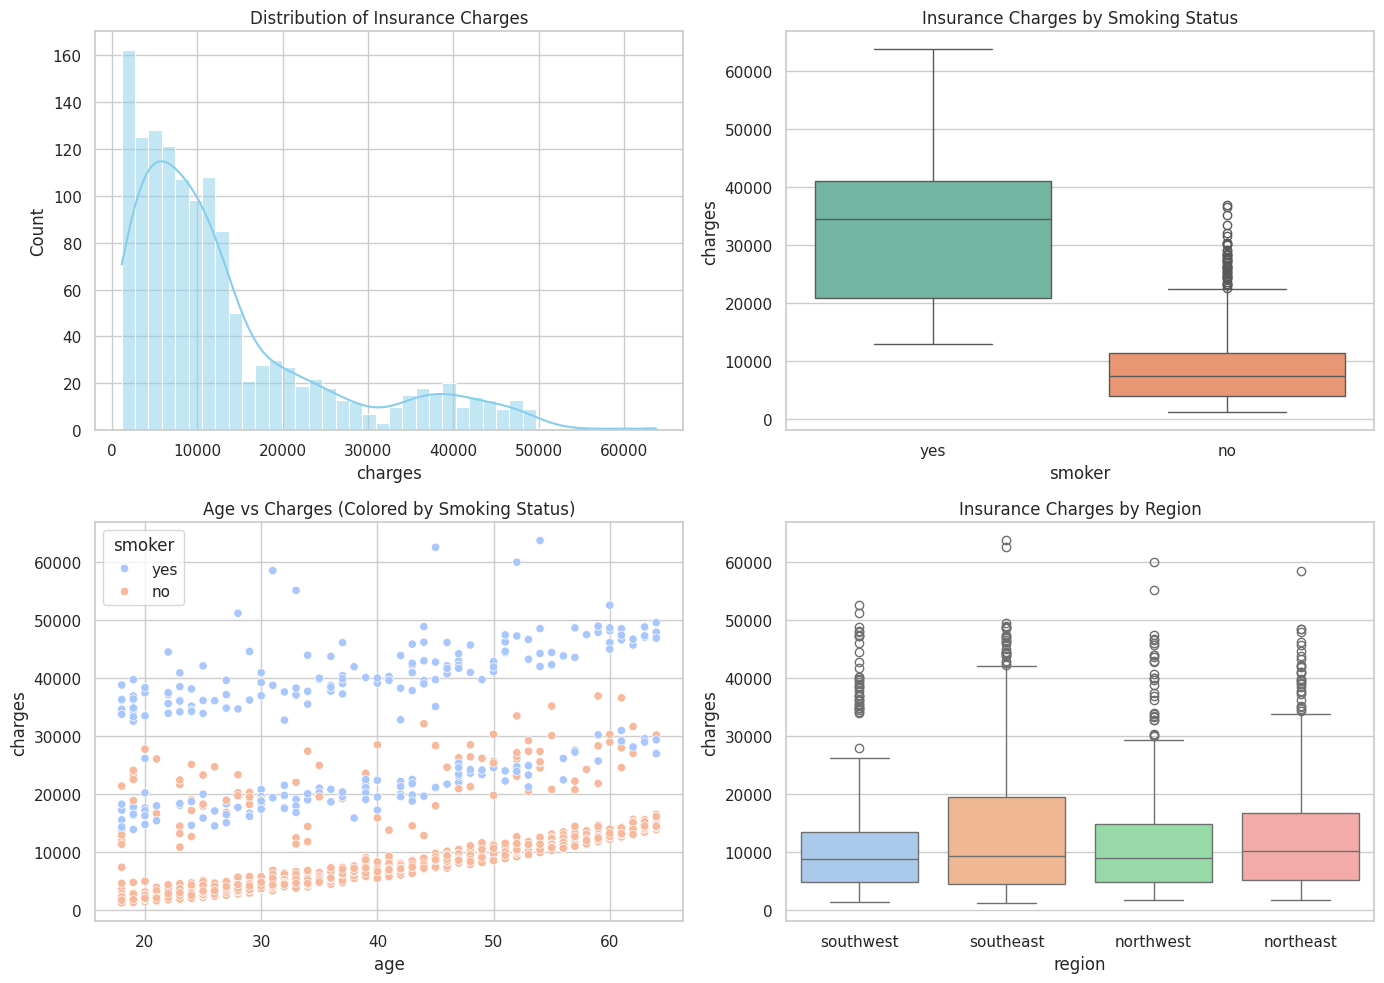

In [11]:

# Set visual style
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Distribution of charges
sns.histplot(df["charges"], bins=40, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title("Distribution of Insurance Charges")

# Charges by smoker
sns.boxplot(data=df, x="smoker", y="charges", palette="Set2", ax=axs[0, 1])
axs[0, 1].set_title("Insurance Charges by Smoking Status")

# Scatter: Age vs Charges
sns.scatterplot(data=df, x="age", y="charges", hue="smoker", palette="coolwarm", ax=axs[1, 0])
axs[1, 0].set_title("Age vs Charges (Colored by Smoking Status)")

# Charges by Region
sns.boxplot(data=df, x="region", y="charges", palette="pastel", ax=axs[1, 1])
axs[1, 1].set_title("Insurance Charges by Region")

# Adjust layout
plt.tight_layout()
plt.show()